# Load Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

 # Load the data

In [2]:
cancer_data=pd.read_csv(r"E:\Breast Cancer Prediction.csv",encoding="unicode_escape")

In [3]:
cancer_data.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4
682,897471,4,8,8,5,4,5,10,4,1,4


# Explore data

In [4]:
cancer_data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


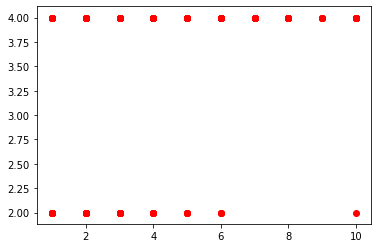

In [5]:
plt.scatter(cancer_data["Marginal Adhesion"],cancer_data["Class"],color="red")

# clean and prepare data

In [6]:
cancer_data=cancer_data.drop("Sample code number",axis=1)
#plt.plot(cancer_data,color="blue")
cancer_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
cancer_data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

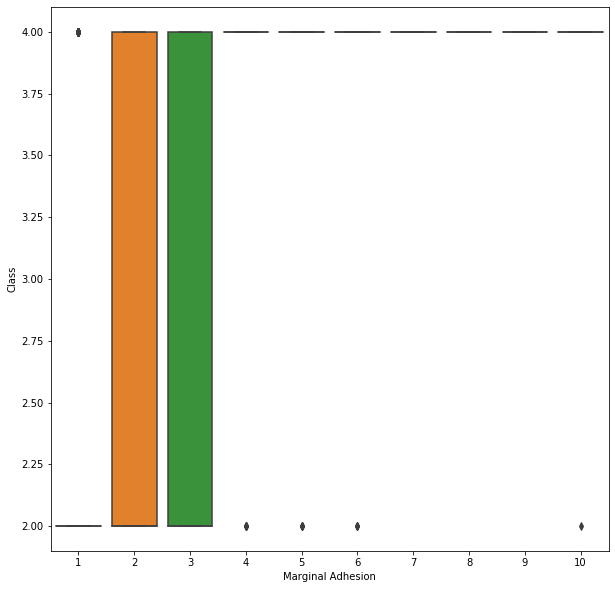

In [8]:
plt.subplots(figsize=(10,10))
sns.boxplot(x="Marginal Adhesion",y="Class",data=cancer_data)

# Split data,Creating a test set and a training set

In [9]:
x,y=cancer_data.iloc[:,:-1],cancer_data.iloc[:,-1]

In [10]:
x[:10]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [12]:
x_train[:5]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
291,1,1,1,1,2,1,3,1,1
237,1,1,1,1,2,1,3,1,1
109,8,6,4,3,5,9,3,1,1
196,1,1,1,1,2,1,3,1,1
642,7,8,8,7,3,10,7,2,3


# SVC Model

In [13]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9963369963369964

In [14]:
y_pred1=svc.predict(x_test)
svc.score(x_test,y_pred1)

1.0

In [15]:
accuracy_score(y_test,y_pred1)

0.9781021897810219

[[78  3]
 [ 0 56]]


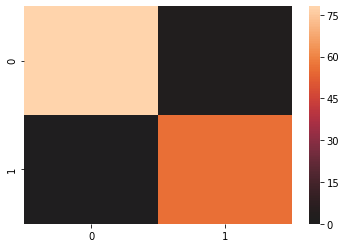

In [16]:
cm1=confusion_matrix(y_test,y_pred1)
print(cm1)
sns.heatmap(cm1,center=True)

# DecisionTree Model

In [17]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

1.0

In [18]:
y_pred2=dtc.predict(x_test)
dtc.score(x_test,y_pred2)

1.0

In [19]:
accuracy_score(y_test,y_pred2)

0.9708029197080292

[[79  2]
 [ 2 54]]


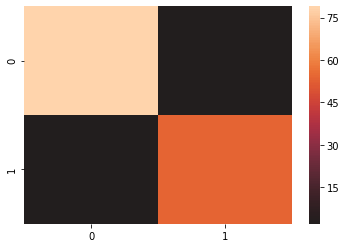

In [20]:
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)
sns.heatmap(cm2,center=False)

# logistic regression Model

In [21]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9633699633699634

In [22]:
y_pred3=lg.predict(x_test)
lg.score(x_test,y_pred3)

1.0

In [23]:
accuracy_score(y_test,y_pred3)

0.9854014598540146

[[80  1]
 [ 1 55]]


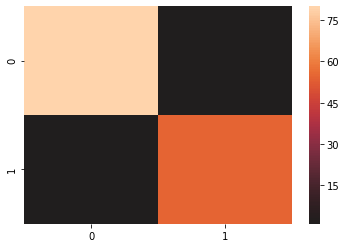

In [24]:
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)
sns.heatmap(cm3,center=False)